# Topic: Shortest paths algorithms
## Assignment objectives
* Implement Floyd-Warschall algorithm - can be implemeneted using matrix notation
* Implement Bellman-Ford algorithm
* Run experiments
* Run additional experiments
* Use histogram, box plot or violin plot

In [8]:
using BenchmarkTools
using Statistics
using Random
using StatsPlots

# Graph generating function
function generate_graph_fw(n::Int, edge_prob::Float64 = 0.8)
    A = fill(Inf, n, n)
    for i in 1:n
        A[i,i] = 0.0
        for j in 1:n
            if i != j && rand() < edge_prob
                # Allow negative weights and avoid negative self-loops
                A[i,j] = rand(-5.0:1.0:10.0) 
            end
        end
    end

    return A
end

# Main Algorithm Floyd Warshall
function floydwarshall(A::Matrix{Float64})
    n = size(A, 1)
    dist = copy(A)

    for k in 1:n
        for i in 1:n
            for j in 1:n
                if dist[i, j] > dist[i, k] + dist[k, j]
                    dist[i, j] = dist[i, k] + dist[k, j]
                end
            end
        end
    end

    return dist
end

# Time estimator for later experiments
function estimate_instances_fw(A::Matrix{Float64}, target_time::Float64 = 420.0)
    sample_runs = 3
    instance_times = [@elapsed floydwarshall(copy(A)) for _ in 1:sample_runs]
    avg_time = mean(instance_times)

    est_instances = max(1, Int(round(target_time / avg_time)))

    return est_instances
end

# Time measuring function
function measure_fw_time(A::Matrix{Float64}, target_time::Float64 = 420.0)
    instances = estimate_instances_fw(A, target_time)
    instance_times = [@elapsed floydwarshall(deepcopy(A)) for _ in 1:instances]
    avg_time = mean(instance_times)
    median_time = median(instance_times)
    total_time = sum(instance_times)
    
    return avg_time, median_time, total_time, instances, instance_times
end

# Function for runnig whole experiment using additional functions
function run_experiment(edge_prob::Float64 = 0.8, target_time::Float64 = 420.0)
    sizes = [10, 50, 100, 200, 400, 600, 800, 1000]
    all_times = []
    
    for size in sizes
        times = []
        A = generate_graph_fw(size, edge_prob)
        avg_time, median_time, total_time, instances, instance_times = measure_fw_time(A, target_time)
        push!(times, avg_time)
        push!(all_times, instance_times)
        println("Size: $size, Avg Time: $avg_time, Median Time: $median_time, Total Time: $total_time, Instances: $instances")
        println("Instance Times: ", instance_times)
    end

    return sizes, all_times
end

run_experiment (generic function with 3 methods)

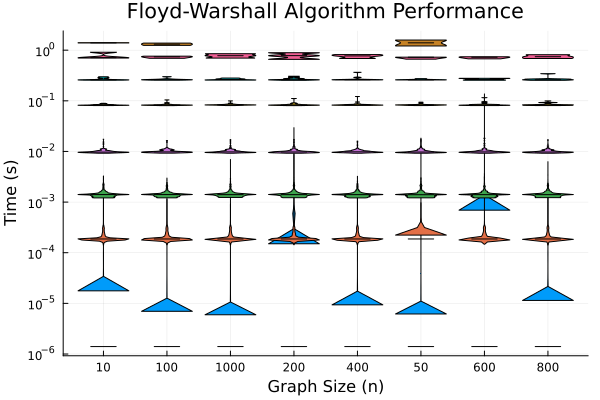

In [10]:
# Run Floyd Warshall Experiment
sizes, times = run_experiment(0.7, 20.0)

violin(
    string.(sizes), 
    times, 
    xlabel="Graph Size (n)", 
    ylabel="Time (s)",
    title="Floyd-Warshall Algorithm Performance",
    show_median=true,
    legend=false,
    yscale=:log10,
    )